## <center> Final Computational Application

### <center> OPTION 2: Decoding the Relationship Between Genes

<center> Minerva University
<center> CS110: Problem Solving with Data Structures and Algorithms
<center> December 13, 2023

**Abstract**

Gene Mutation and the field of Genetics are of significant value to our society due to their contribution to fields like paleontology, agronomy, medicine, forensics, etc. Genealogical mutation sequencing, thus, becomes essential in understanding the relationship between organisms their DNA sequences, and our understanding of the world. As such, this report aims to document the investigations performed to produce a program to map the relationship between different DNA sequences that may have undergone mutations from one another. These mutations occur randomly and involve the deletion of an existing character, the insertion of a new character, or the change of an existing character into another one.
Given a set of seven sequences, the program must determine which sequences are 'most similar' to each other to identify the parent sequence from which two children sequences were produced after a set of mutations, which then produced two grandchildren sequences (two grandchildren sequences from each children sequence) after undergoing mutations again. This report introduces the concept of the Longest Common Subsequence as a way to measure similarity and develops local and global strategies for reconstructing the genealogy of the seven given sequences. An evaluation of both approaches is provided explaining which decision variables affect the choice of one algorithmic approach over another. Finally, the genealogical relationship of these seven sequences is employed to estimate the probabilities of an insertion, deletion, or mutation occurring for each character of a mutating sequence. 

### Introduction: Defining similarity with Longest Common Subsequence

Similarity between a pair of gene sequences can be defined in terms of their longest common subsequence (LCS). An LCS of sequences X and Y is a subsequence Z of elements that are contained in both X and Y, in a strictly increasing order of indices for each. These elements, however, may or may not be consecutive to each other in either of the input gene sequences.

For example, if X = {G, C, C, T, C} and Y = {G, A, C, C}, the longest common subsequence between the two will be z = {G, C, C} as it is the longest subsequence of elements present in both X and Y which are in strictly increasing order of their respective indices (although not necessarily consecutively). The longer the LCS relative to the length of the input sequences, the more similar the sequences are. 

The function common_longest_subsequence() returns all longest common subsequences (LCSs) for a pair of sequences and their length. To do so, this function implements a dynamic programming approach which first constructs a matrix with shape ($m_1$, $m_2$) where $m_1$ represents the number of items in one of the sequences in the pair and $m_2$ represents the number of items in the other. This matrix, c, will store the length of the LCS for the combination of characters up to c[i][j] where i and j are the indices of the characters in the sequences which can take values from 0 to $m_1$ and $m_2$ respectively. It does so by examining the contiguous cells to the left and above the one being calculated, benefiting from the overlap of subproblems. By following this approach, the bottom right corner cell in our matrix c will hold the value of the length of the LCS between the two sequences. 

To then reconstruct all LCS, the algorithm traverses that same c matrix in the opposite direction, building up from the bottom-right corner, all the way to the top-left one. For each cell in the matrix, the procedure checks whether the characters of both sequences in those positions are the same, in which case it means that such character belongs in the LCS. If this condition is met, the character is appended to the LCS and the procedure moves to evaluating the cell diagonally contiguous to the top-right corner of the recently evaluated cell. However, if the characters of the sequences for that cell of the matrix are not the same, the procedure will choose between continuing traversing the matrix toward the cell contiguous to the left of the current one, above the current one, or both. To determine this, it will check which of the two cells has a higher LCS length value and select the one with the highest one. If both cells have the same LCS value, it will recursively traverse both paths: the one from the cell to the left and the one from the cell above. The possibility of evaluating both paths is what allows for more than one LCS of the same length to be retrieved.

To understand why the dynamic programming procedure in the function common_longest_subsequence() successfully computes all LCSs for a pair of sequences, we must prove that it satisfies the overlapping subproblems and optimal substructure conditions.

**Evaluating the LCS computing procedure's properties**

To demonstrate why the problem satisfies the overlapping subproblems and optimal substructure properties let us use the following example: We want to compute all LCS for the pair of sequences X = {A, C, B, A} and Y = {A, B, C, A}. Our problem exhibits an optimal substructure property if its optimal solution contains the optimal solutions of subproblems within it. To demonstrate that this is the case we must identify the global solution to the overall problem, and prove that it contains optimal solutions to subproblems within it. The global solution to this problem (which can also be found in the fifth test case of Appendix A) is {A, B, A}, {A, c, A} where both subsequences are LCSs of X and Y. 

Now, let us break down the problem into subproblems. The subproblems to this problem are all the combinations resulting from iterating through one of the sequences taking an additional character each time, and comparing it to the iteration through the second sequence also taking an additional character at each iteration. 
To determine the LCS between X and Y, we must first determine the LCS between the following sequences:                     
{A, C, B, A} and {A, B, C, A}, {A, C, B, A} and {A, B, C}, {A, C, B, A} and {A, B}, {A, C, B, A} and {A}                   
{A, C, B} and {A, B, C, A}, {A, C, B} and {A, B, C}, {A, C, B} and {A, B}, {A, C, B} and {A}                               
{A, C} and {A, B, C, A}, {A, C} and {A, B, C}, {A, C} and {A, B}, {A, C} and {A}                                           
{A} and {A, B, C, A}, {A} and {A, B, C}, {A} and {A, B}, {A} and {A}                                                       
we can demonstrate that the optimal solution to determining the LCS between a certain subproblem like the pair of sequences {A, C, B} and {A, B, C} is contained within the optimal solution of LCS for X and Y. As we can see, the optimal LCSs solution{A, C}, {A, B} to this subproblem is contained within the optimal solution to the overall problem {A, C, A}, {A, B, A}. 

Additionally, we can demonstrate that these subproblems overlap. For example, in order to compute the LCSs for the subproblem for the pair of sequences {A, C, B} and {A, B} we will need to consider the solution to the subsubproblem for the pair {A, C} and {A}. If we store the solution to this subsubproblem, which is an LCS of {A}, we can then use to build upon it when computing the LCS between {A, C, B} and {A, B} which will be the solution of extending the solution to {A, C} and {A} (found to be {A}) when adding the next character common in both sequences (which in this case is 'B') yielding a solution to the subproblem {A, B}. This same subsubproblem: the pair {A, C} and {A} will appear in other subproblems, for example {A, C} and {A, B} whose solution will be the result of extending the solution to the subsubproblem {A, C} and {A} (found to be {A}) when adding the next character common in both sequences (which in this case does not exist as the addition of the character 'B' to the second sequence did not result in any other common characters in both). 

It is thanks to the satisfaction of these two properties that computing matrix c within the longest_common_subsequence procedure() efficient and effective. This matrix represents all possible subproblems as each of its cells, where c[i][j] considers all the characters for the first sequence up to the index i and all the characters up to the index j for the second sequence. It benefits from the overlapping subproblem by accessing the cells whose LCS lengths have already been computed multiple times. Depending on the following conditions: 1) if the characters of both sequences at indices i and j are the same, 2) else if the value of the cell contiguous to the left of the current cell has a lower value than the cell contiguous above, 3) else if the value of the cell contiguous to the left of the current cell has a higher value than the cell contiguous above (if the values of the cells contiguous left and above are the same, the value of the current cell will be the same) it computes the value of the current cell by: 1) adding 1 to the value of the cell diagonally top-left of the current one, 2) keeping the same value as the cell contiguous above or 3) keeping the same value as the cell contiguous to the left, respectively. This means that depending on which condition is met, a given cell could potentially be accessed to assist in the process of computing a cell contigous below it, contiguous to its right, or contiguous diagonally to its bottom-right corner (given that it is not in any of the borders of the matrix), optimizing the calculation of up to three other subproblems, while always yielding the optimal solution.

**LCS lengths for reconstructing genealogy**

Let the list set_strings refer to the list of gene sequences generated by a gene-sequencing generation program which we are determining the genealogical relationship for. This genealogical relationship can be derived from an analysis of the similarity among sequences, for which LCS lengths can be an informative matrix. To produce the matrix of LCS lengths for all pairs of these seven sequences in set_strings, however, we do not need to compute all LCS for each pair of sequences as they all have the same length. Thus, we employ the function lcs_length_calculator() to return the length of a LCS of any given pair of sequences, following the same procedure as to build matrix c in the function longest_common_subsequence. The function lengths_matrix() produces a matrix for a given set of sequences, storing all LCS lengths for all the combinations of the sequences inputted. These procedures can be found in Appendix A. When running lengths_matrix() on set_strings, it produces the matrix shown in Figure 1.

However, to manually infer which pairs of sequences are more closely related to each other, there is an extra step to take. Simply comparing the lengths of LCS of different pairs to each other may be misleading, as some are significantly longer than others (insertions and deletions may alter sequence lengths). A more accurate measure of the similarity between two sequences is the length of their LCS relative to the lengths of the original sequences. For the purpose of this report, whenever mentioned 'relative LCS' refers to the longest common subsequence for two sequences relative to the average lengths of those two sequences. As such, we must reproduce the sequences matrix, dividing the LCS by the average of its input sequences so that we can work with this new metric. 

For example, the LCS of the gene sequences (a) and (b) in set_strings has a length of 90. (a) has a length of 124, and (b) has a length of 100. Their relative LCS will then be: $90/((124+100)/2) = 0.8036$. 

The procedure to perform these calculations is found in Appendix B. The resulting matrix can be seen in Figure 2. 

<figure>
<image src=".\Figures\Figure 1.png" style="XXXpx"/>

</figure>

<figure>
<image src=".\Figures\Figure 2.png" style="XXXpx"/>

</figure>

From the matrix in Figure 2, we can try to manually examine which strings are more closely related to each other. To do this, I compared the relative LCS values amongst each other. The highest value was 0.9099 which means that sequences (f) and (d) are very similar to each other.

If for every sequence, we sort all other sequences by their similarity according to the relative LCS values, we obtain the following:
<li> (a): c > b > e > f > d > g
<li> (b): c > f > a > g > d > e
<li> (c): a > e > b > f > d > g
<li> (d): f > g > b > c > e > a
<li> (e): c > a > b > f > d > g
<li> (f): d > g > b > c > a > e
<li> (g): f > d > b > c > e > a

From this, we can infer that (b) is likely to be the parent sequence, as it is at a similar distance from all other sequences in terms of relative LCS. Depending on how many generations away from the parent node a different node is, the more mutations it will have undergone, and thus the most relatively different it will be compared to all other sequences. As such, we expect leaf nodes to be relatively similar to their parent but significantly different from all other sequences. Thus, we can see how (g), (e) and (a) are likely to be grandchildren nodes as they appear at least twice at the end of the comparison lists of all other sequences. (d) follows closely, showing four times as the second to last most similar sequence to the rest of the sequences. We can also infer that any sequence is most likely to be connected with those other sequences most closely related, making (g) and (d) likely children of (f) and (a) and (e) likely children of (c). 
    
Now, let us examine how different algorithmic strategies determine the precise relationship between these gene sequences.

### Determining Genealogical Relationship: Algorithmic Approaches

This report will discuss two different algorithmic approaches to constructing a genealogical tree which will represent the relationship between sequences, identifying the parent node that underwent mutations resulting in two children nodes which themselves underwent mutations resulting in two grandchildren nodes each. Given that each parent sequence mutates to produce two new sequences, both algorithmic approaches will be based on the assumption that the resulting genealogical tree will be a complete binary tree. The data structure supporting both algorithms will be a binary tree where the root node is the parent node of the set of sequences. This can be found in Appendix C. 

**Local strategy**
    
A local strategy for determining the genealogical relationship between gene sequences infers the location of a sequence in the genealogical tree based on a greedy property of that sequence. In this case, the metric is the relative LCS length for that sequence and another given sequence. This strategy is implemented through a greedy algorithm that for each node, identifies another node with which it shares the highest LCS and saves it as its parent. Let us examine its procedure. 
    
The algorithm starts by identifying the number of leaf nodes that the genealogical tree will have and which sequences belong to those leaf nodes. This process is based on the assumption that the more generations away from the root node a sequence is, the more mutations it has undergone, and as such, the more variance it will have among the LCSs with all other sequences. Thus, the procedure first computes the mean LCS for each sequence, and its standard deviation and then calculates how many standard deviations away the longest positive LCS for that sequence is away from the mean, storing these values in a dictionary. 
    
Once the algorithm identifies the number of leaf nodes for the tree we are calculating, it selects that number of nodes and following our local metric, for each of those nodes identifies which other node is most similar to it, meaning has the longest relative LCS in common. Because all these nodes have been identified as leaf nodes, we know that the sequences identified as most closely related must necessarily be their parent sequences. When all these connections have been drawn out, we need to make sure that no violations have occurred. Violations, in the context of this algorithmic approach, result from cases where not all pairs of children share a parent, in which case, we would find at least two parent nodes with only one child node associated with them. This becomes a problem as the algorithm assumes that the tree is complete and there is a 2 to 1 ratio between the number of children nodes and the number of their parent nodes, meaning that each level, starting to count from the bottom of the tree, will have half the nodes as the previous level did. If these violations are not fixed, the algorithm will fail to produce a tree as it will run out of available nodes when mapping the relationships at the next level of the tree. To fix violations, the function fix_violations() identifies which parent nodes have only one child (if any), selects half of them to be completed, reasigning the children accordingly, and ensures to make the remaining parent nodes are available again to be considered when identifying relationships at the next level. Once all children have been correctly assigned to their parents, we can remove all leaf node sequences from the pool of sequences whose position in the tree we must identify and move on to identify all the connections of the nodes that fall in the next level.

These nodes will already have all their children's relationships identified, which means that the procedure simply needs to identify their respective parents. To do so, it will again identify which out of the available sequences remaining has the longest relative LCS for that sequence and select it as the parent node, updating the variables that store which sequences are still available and which sequences have been used. Once there is only one sequence left whose parent relationship has not been determined, the procedure identifies it as the root of the tree and prints out its relationships. 

This procedure can be found in Appendix D. When it is run on set_strings, it produces the tree local_tree, shown in Figure 3. 

**Evaluating the greedy procedure's properties**

In order to implement an effective local (greedy) strategy, our problem must exhibit an optimal substructure. For this to be the case, the optimal solution to the problem must contain the optimal solutions to subproblems within it. To prove that this is the case let's examine an example for determining genealogy for the sequences in set_strings. Let us demonstrate that the optimal genealogical tree containing all seven sequences is also comprised of the optimal subtrees in the left and right branches of the parent node. 
The optimal global solution is that in which the parent or root node sequence is connected to the two children node sequences to which it is most closely related. These two children's node sequences will at the same time, be connected to an additional two sequences which they share the most similarity with. This implies that a children's node sequence will be connected with the three most closely related sequences to it. The leaf node sequences that are not connected to the same parent node will be most different from each other. This implies that to build the optimal global tree for a set of seven sequences, the two subtrees located at the left and right children nodes of the root must also be the optimal subtrees of the two sets of three nodes, where the leaf nodes will be most closely related to their parent and sibling, and least related to the leaf nodes in the separate subtree. 

From the inferences drawn manually from the matrix produced for all relative LCSs we would expect (b) to be the parent node of the tree, and (c) and (f) to be its immediate children. That would leave (a), (d), (e) and (g) as leaf nodes. Given that this tree exhibits an optimal substructure, we must demonstrate that the optimal tree composed of all these seven nodes with root node (b) includes two optimal subtrees of root nodes (c) and (f). Following from the assumption that a most similar to another node indicates a closer relationship when constructing the subtree rooted at (c) with available nodes (a), (d), (e), (g) and (f), we would assume that the sequences identified as children nodes would be those with a longest relative LCS to (c), as the longer the LCS the more similar we would expect the sequences to be. Based on the relationships derived manually in the section above, we can see that (a) and (e) are the nodes with the highest LCS with (c), meaning that the optimal solution to the structure of this subtree, is that in which (c) is the parent node connected to (a) and (e) as children, as both (e) and (a) are also more similar to (c) than among each other or to other sequences. From this, we can conclude that the optimal solution to the problem also includes solutions to subproblems denoting an optimal substructure.

Although this local procedure seems to produce the optimal tree for the sequences in set_strings, as the relationships mapped by the output are the same as those manually identified in the section above, a local greedy approach with this metric does not always ensure that the global optimal solution will be achieved. This means that the greedy property is not maintained, and thus, we can not confidently rely on the output being most optimal for any set of sequences. Let us discuss why this is the case. 

Given that the events that insertions, deletions and mutations are probabilistic, the combination of characters in mutated sequences resulting from a parent node has wide variability. This means that, even if very unlikely, it could be the case for example, that the two mutated children sequences from a parent end up being relatively similar to each other, creating a scenario such as the following:                                                                                                             
Imagine we are determining the relationship between four sequences (x), (y), (v) and (z). The lengths of the relative LCS of certain pairs of these sequences are the following: 
 (x) -- (y): 0.70,
 (x) -- (v): 0.80,
 (x) -- (z): 0.10,
 (v) -- (y): 0.65,
 (z) -- (v): 0.40,  
 
The local greedy approach would start by identifying two leaf nodes and their parent. In this case, (y) and (v) would be the leaf nodes and (x) would be their parent node, as the highest LCS combinations are 0.70 between (x) and (y), and 0.80 between (x) and (v). Next, the parent of (x) would be identified. As this procedure follows a greedy property and (z) would be the only sequence remaining, (z) would become the parent of (x) with an LCS connection of 0.10. However, in reality, the global solution would be to identify (v) as the parent node of (y) and (x) with LCSs 0.65 and 0.80 respectively, and (z) as the parent node with an LCS of 0.40.                                                                                       
This example demonstrates how, although these scenarios may be highly unlikely, the local procedure's inability to deal with them means that even if the locally optimum choice is made for every subproblem, the global optimum will not be achieved, violating the greedy property. Consequently, we must examine a different approach that employs a global metric to ensure that the global optimum solution can always be achieved.

<figure>
<image src=".\Figures\Figure 3.png" style="XXXpx"/>

</figure>

**Global strategy**

A global strategy to determining the genealogy of a set of sequences infers the whole tree by considering all the relationships between sequences in that tree at once. The metric used to do so is the highest average relative LCS length for all the pairs of related sequences in the tree. This strategy is implemented through a brute force algorithm, which produces all possible combinations of trees, given a set of sequences, and calculates all their average relative LCS lengths to identify the tree with the highest one. 

The algorithm starts by producing all possible combinations of trees with the function generate_combinations(). This procedure takes a list of all the nodes that must be in our tree and recursively generates all combinations of trees that result from selecting one node at a time to be the root node. For the input sequences set_strings which has seven nodes, there are seven factorial, $7! = 5040$, possible tree combinations. Then, for each of the possible tree combinations, the function calculate_tree_score() computes the average relative LCS for that tree, by finding the average relative LCS for all the pairs of sequences that are connected in the tree. For every average relative LCS computed the algorithm compares its value with a variable that stores the highest average relative LCS encountered until then (which originally has a sentinel of negative infinity) and updates that variable with the current average relative LCS if it is bigger than the previous highest value. If this update takes place, then the variable best_tree saves the tree whose average relative LCS was just identified. Once the algorithm has iterated through all possible trees, the tree last assigned to best_tree will be the one with the highest average relative LCS and as such, the most likely to be the optimal solution we are looking for. 

This procedure can be found in Appendix E. When it is run on set_strings, it produces the tree local_tree, shown in Figure 4. 

The reason why the highest average relative LCS was chosen as a global metric for this algorithmic approach is that as explained when defining similarity, it is assumed that a higher LCS between two sequences indicates more similarity between the two, as more of the characters overlap, meaning that the two sequences are less mutations away from each other. If the average relative LCS for a tree is high, it means that most if not all of the connections of sequences within the tree also have high relative LCS values themselves, meaning they are a few mutations away from each other and hence, closely related. By maximizing the average relative LCS value of a tree, we are also maximizing how closely related pairs of sequences that are linked are, meaning that if all links are maximized, the resulting genealogical tree will be the correct representation of the sequences of mutations that a parent node underwent to produce all other sequences. 

As we can see, both trees shown in Figure 3. (computed with the local greedy algorithm) and Figure 4. (computed with the global brute force algorithm) depict the genealogical relation. These results are consistent with the manually inferred relationships for set_strings, which we expect to be the optimal solution to the reconstruction of the genealogical relationship for strings (a) to (g). Although we could have expected that the local greedy approach would not yield the global optimal solution by making certain greedy choices (as demonstrated when assessing the properties of the greedy procedure), in the case of this input, the global optimal solution was reached through the greedy choices made. 

<figure>
<image src=".\Figure 4.png" style="XXXpx"/>

</figure>

### Analyzing the Time Complexity of the Local and Global Strategies

**Theoretical Complexity**

The lcs_length() function has a time complexity of $Big-Theta(m_1.m_2)$ where m_1 is the number of characters in one of the sequences and m_2 is the number of characters in the other sequence for which we are computing the length of the LCS. This is the case as the algorithm fills in a matrix with shape (n1, n2) through a dynamic programming approach in which it takes $Big-Theta(1)$ time to compute the value for each cell in the matrix. 

The relative_lcs_matrix() function has a time complexity of $O(n^2) x Big-Theta(m_1. m_2)$ as the algorithm runs two nested for loops to iterate through the number of sequences for which the relative LCSs are being computed while calculating each pair of sequences' respective relative LCS by first computing their LCS, which as demonstrated above takes $Big-Theta(m_1.m_2)$ times. This can be simplified to $O((n^2).(m^2))$ where n is the number of sequences and m is the number of characters in each sequence. 

All the operations supported by the Node() and BinaryTree() classes take $O(1)$ time, except for the method to_string() which takes $O(n)$ time as it recursively accesses every node to print it, which takes $O(1)$ time.

The genealogy_local() algorithm includes the function fix_violations() which takes $O(n^3)$ time to run, where n is the number of nodes that need to be fixed, due to the retrieval of the maximum relative LCS of the parent node to be fixed with any given sequence, while still checking that the selected node is available to become a child node. In the case that no nodes are violating the children-to-parent node ratio, the procedure takes $O(n)$ time to confirm that indeed no violations have happened. Taking this into account, we can determine the scaling behavior of the genealogy_local() algorithm. This procedure will take $O(n^3)$ time, where n is the number of sequences whose genealogical tree we are constructing. This is because to determine the genealogy of all nodes at a certain height of the tree, it iterates through the number of nodes that should be at that height of the tree and identifies the node with maximum relative LCS to the current node while checking that it is still available. This process occurs once with all leaf nodes and a second time with all remaining non-leaf nodes, potentially fixing violations between the two sections, which means that the largest number of iterations of a for loop with two nested for loops will be n/2 (the number of leaf nodes) where n is the number of sequences whose genealogy we are reconstructing. 

The genealogy_global() algorithm includes the function generate_trees() which because it must generate all possible permutations of a tree comprised of the number of sequences, takes $O(n!)$ time where n is the number of sequences input. The function calculate_tree_scores() will take $O(n)$ time, where n is the number of input sequences, to retrieve the relative LCS lengths of all pairs of sequences in a given tree, as it will iterate through n/2 parent sequences and retrieve the relative LCS lengths of each with both its children. Taking this into account, we can derive that the overall time complexity of the genealogy_global algorithm will be $O(n!.n)$ where n is the number of input sequences, as the procedure will iterate through all possible combinations of trees (which we have shown to take $O(n!)$), and for each of them compute their scores which takes $O(n)$ time.

**Corroborating with experimental results**

Both the local and global approaches make use of the lcs_length() and relative_lcs_matrix() functions to produce the matrix of relative LCSs that inform the global and local metrics to compute genealogical relations. This means that the asymptotically scaling behavior defined by $O((n^2).(m^2))$ where n is the number of sequences and m is the number of characters in each sequence will affect the production of the matrix for both equally. Thus, to experimentally corroborate the differences in scaling behavior between the local greedy algorithm and the global brute force approach, the experimental simulations conducted time the performance of the algorithmic procedure only. 

To reduce noise in the calculation of runtime for both algorithms, the simulation will perform ten experiments for each input size. Ideally, more experiments would yield better results, but due to the high computational demands of the algorithm, a good enough value of ten was chosen. Both algorithms are run on increasing input sizes, which are determined by the number of levels in the tree (height +1). This means that if the input size is three, n=3, the maximum number of sequences on which the local and global algorithms will run is $(2^n) - 1 = 7$. Because the brute force approach computes all permutations of the input sequences, the maximum input size possible for running experiments on this algorithm was a tree height of 2, which means 7 sequences and 5040 permutations. As soon as the input size is increased past that, the number of permutations becomes 1307674368000 which makes it impossible to run the brute force algorithm. Consequently, I performed separate experiments on the greedy algorithm with larger input sizes (up to a tree height of six). 

Although very limited, these experimental results corroborate the derived theoretical complexity. We can observe how even with a small input size of seven sequences, there is a very large difference between the average runtime of the local greedy algorithm and the global brute force one. This contrast is shown in Figure 5., where it almost seems as if the greedy algorithm runs in constant time due to the large difference in runtimes which is not captured by the scale properly. Hence, we must zoom into the curve representing the average runtime of the local greedy algorithm. This is shown in Figure 6. When doing so, we see that the curve is actually not linear, but rather the average runtime increases significantly relative to the previous data points. This behavior is best captured in Figure 7, which shows the scaling behavior of the local greedy algorithm on a larger input size (up to 127 sequences). 

This scaling behavior is best understood by looking at the impact that doubling the input size has on runtime. The employment of Big-O notation represents the asymptotic upper bound to an algorithm's scaling behavior. This means that we would expect the average runtime of an algorithm at most to be close to the value determined by the factor of growth of the asymptotic notation, while never becoming higher, or crossing this 'asymptotic curve'. What this means for each of our algorithms is that we would expect the change in average runtime of the local greedy algorithm to change by at most $O(n^3)$ and the average runtime of the global brute force approach by at most $O(n!.n)$ where n is the number of sequences whose genealogy we are computing in both cases. 

In practical terms, this means that for an input size increase of height 1 to height 2, so a change in the number of sequences from 3 to 7, we would expect the average runtime of the local greedy algorithm to change by at most, approximately 12.7. Our experimental runtime instead shows a change in runtime by approximately 4.3. However, this is not a particularly accurate representation of the algorithm's behavior, as an input size of 3 almost has no computational costs involved in identifying the parent sequence for the two leaf nodes. It is important to note that due to a shortfall in the implementation of the local greedy algorithm, the function was adapted to run the experiments by including a try, except statement. This may alter the experimental results of running the algorithm slightly, compared to the expected results.  

For an input size increase of height 1 to height 2, so a change in the number of sequences from 3 to 7, we would expect the average runtime of the global brute force approach, to change by a factor of at most 1960.0. Our experimental results are well within this bound with a change in average runtime of approximately 1288. All these calculations can be found in Appendix H. 

Clearly, we can conclude that the local greedy approach outperforms the global brute force approach in terms of its time complexity. 

<figure>
<image src=".\Figures\Figure 5.png" style="XXXpx"/>

</figure>


<figure>
<image  src=".\Figures\Figure 6.png"style="XXXpx"/>

</figure>



<figure>
<image  src=".\Figures\Figure 7.png" style="XXXpx"/>

</figure>

### Discussion: Optimization and Strategy Choice

**Understanding optimization**

In order to evaluate which algorithmic strategy is preferable in determining the genealogical relationship between a set of sequences, let us employ the concept of optimization. Optimization is the process of determining the local or global extrema (either minima or maxima) within a set of solutions that fit within a problem's constraints. To identify such extrema, we must characterize the problem clearly defining the variable to be optimized, the variables that can be altered in search of that optimal value, and the set of constraints shaping the problem at hand. Depending on how we define our optimization problem, we will prefer an algorithmic strategy over the other. 

Case 1: We pursue the optimization of local similarity, meaning that for every sequence within the set of sequences in our problem, we aim to identify another sequence most similar to it. The optimization variable to be maximized in this case would be the relative LCS length between the two sequences, as we have assumed that the higher the relative LCS of two sequences, the more similar the two sequences are. The main decision variable within this definition of the problem is the sequence with which to pair any given sequence, as depending on which sequences are paired together, their relative LCS length will change. This problem has one significant constraint: a sequence can at most be paired with three other sequences, due to the binary structure of the genealogical tree. If that given sequence is located at a leaf node of the genealogical tree it will only be connected to one other sequence, and if it is located at the root of the genealogical tree it will only be connected to two other sequences. This means that once a sequence has had three other sequences identified as the most similar to it, it becomes unavailable for other sequences to consider being paired with it.

If local similarity were to be our optimization objective when employing an algorithmic strategy to construct genealogy, we would not prioritize ensuring that all connections of the tree represent the correct direct relations, but rather, that each node is paired with the (at most three) sequences available that are most similar to it. As explained in the sections above, this may or may not result in the correct global optimal tree. However, this should not be a problem if our optimization variable remains locally similar. 

Case 2: We pursue the optimization of global genealogy mapping, meaning that we aim to identify the genealogical tree that best represents the process by which an original parent sequence underwent multiple instances of mutations to give rise to different generations of sequences, where each time a sequence mutates it does so by producing two new sequences. The optimization variable to be maximized in this case would be the average relative LCS length for all the connections of sequences within the genealogical tree, as we can infer that the higher the average LCS length of all connections, the more related to each other most combinations of pairs must be. For this definition of the problem, the main decision variable is not each choice of sequence that maximizes the relative LCS for a given sequence, but rather the combination of all sequences, ensuring that we do not encounter the constraint of one sequence not being available after it has been assigned to another sequence. Although this characterization of the problem avoids the constraint present when optimizing the local similarity, it presents a significant obstacle. The computational cost of such optimization is very high. It could vary depending on the implementation, but it would for sure be more costly than optimizing for the local similarity, as the number of combinations considered to optimize the global genealogy becomes very high. 

If global genealogy mapping were to be our optimization objective, when employing an algorithmic strategy to construct genealogy, we would make sure to check all possible combinations of sequences in a tree, to ensure we select the one that yields the best reconstruction of genealogical relationships.

Case 3: We pursue the optimization of computational resources, meaning that we aim to minimize the space and time complexities of our algorithmic strategy when solving the problem of genealogical reconstruction. For this report, I will discuss the optimization variable of time complexity (although space complexity or a combination of the two would also inform such an optimization problem). For this definition of the problem, the main decision variables are the algorithmic implementation itself, and within it, the metric employed to construct the genealogy. The main obstacle of this optimization problem, which can become a constraint in certain cases is the computational resources of the hardware in which the algorithm is running. Another obstacle is that the output of the algorithmic implementation could be hardly aligned with the problem at hand, determining the genealogical tree of a set of sequences, depending on which metric is employed in the algorithmic strategy. 

If computational resources were to be our optimization objective, when employing an algorithmic strategy to construct genealogy, we would pay most attention to the type of approach employed, ie. greedy, dynamic programming, brute force and the specific choice of data structures within them. 

**Strategy choice**

Now that we have identified the three main optimization objectives that we could consider, let us evaluate which of the two implemented approaches: a local, greedy algorithm or a global, brute force algorithm, we would choose in each case. 

For the optimization objective in Case 1: optimizing for local similarity, we would prefer to employ the local, greedy algorithm. This algorithm will employ the metric of relative LCS between each pair of sequences, to for every given sequence, identify another sequence that is most similar to. This is a sensible choice if we would like to construct a genealogical tree through simple, greedy choices for each subproblem within our main problem, and we are willing to take the risk of not reaching the global optimal genealogical tree. 

For the optimization objective in Case 2: optimizing for global genealogy mapping, we would prefer to employ the global brute force algorithm. This algorithm will make sure to generate all possible permutations of sequences to construct a genealogical tree and employ the metric of average relative LCS for all sequence combinations within the tree to identify the tree that best represents the order in which parent sequences mutated into children sequences. This is a sensible choice if we would like to construct the optimal genealogical tree, ensuring the global optimal solution is reached. However, as the input size increases, the computational demands of such an algorithm will be very high. 

For the optimization objective in Case 3: optimizing the computational resources employed in reconstructing the genealogical relationship between a set of sequences we would likely almost always prefer the local, greedy approach. As shown in the complexity analysis section above, the local greedy approach's scaling behavior is $O(n^3)$ while the global brute force approach's scaling behavior is $O(n!.n)$, where n is the number of sequences in both cases. Because both algorithms assume the completeness of the genealogical tree, the input sizes will increase by $(2^n)-1$. This means that input sizes will be n=1, n=3, n=7, n=15, and so on. Although the brute force may be able to run in a reasonable amount of time for small input sizes (n=7 already takes around 0.96473 seconds to run though), the local greedy algorithm is also likely to output the global optimal solution. As soon as n becomes larger than 7, the brute force algorithm starts taking days or even years, depending on the computational power of the hardware employed, to produce its output (for example for n=15, the algorithm would have to evaluate fifteen factorial, $15!=1307674368000$, tree permutations)! In practice, it is probably worth taking the risk of not obtaining the optimal global output, for the sake of obtaining an answer in a relatively short amount of time, especially as input size increases. 

It is important to note that the complexity of these two algorithmic approaches could be optimized further. For example, the local greedy algorithm's time complexity could be reduced to $O(n^2)$ relatively easily by implementing the extraction of the highest relative LCS length for a given sequence more efficiently, potentially through the use of priority queue data structures. The global algorithm could benefit from the implementation of a different strategy, potentially storing tree combinations and their values so that redundant combinations that represent the same tree need not be generated. Nonetheless, because multiple permutations of trees would still need to be generated, the time complexity of this algorithm is likely to still be larger than for the greedy approach. 

### Estimating the Probabilities of Insertion, Deletion and Mutation

Let us now proceed to calculate what are some plausible probabilities for any character in a sequence to be deleted, for an additional character to be inserted, or for that given character to mutate into a different character. The probabilities of each of these scenarios can be named p_insertion, p_deletion, p_mutation. 

Given that this dataset is comprised of seven sequences only, the following approximations of the probabilities of these three types of mutations will not be too accurate and meaningful. However, they can still provide us with a general understanding of the mutation process and its implications in the genealogy calculations for the sequence. 

To start with, let us examine the tree produced by our different local and global algorithms, which indicates that (b) was the parent sequence from which (c) and (f) mutated. These last two themselves underwent mutations to give rise to (a) and (e) and (g) and (d) respectively. By looking at the length of the resulting sequences after a parent sequence underwent mutation relative to the parent sequence, we can identify the average length change relative to the given original sequence. By looking at these values we can infer that at each new generation, the sequences become longer which means that insertions are more likely to occur than deletions. As shown in Appendix F, the variable avg_len_change stores the calculated mean of the lengths of each sequence relative to its parent. When subtracting 1 to this value we obtain the percentage
in the percentage point difference between the probability of a deletion and an insertion occurring. The resulting value means that it is approximately 8% more likely for an insertion to happen compared to a deletion. 

Similarly, we can look at the LCS length of each parent sequence and one of its children at a time. The variable lcs_relative_parent holds the mean of the LCSs of each parent sequence and its children, which is obtained by dividing each LCS by the length of the parent sequence. When subtracting this average from one, we obtain the LCS length relative to the original string. This value yields approximately a 90% average overlap between the original sequence and its longest common subsequence with its children, which means that the remaining 10% accounts for the part of the child sequence that underwent either deletions or mutations on average. 

Considering that deletions and mutations can be estimated to occur on average, 10% of the times that a sequence replicates itself to produce children and that insertions are 8% more likely to occur than deletions, we can estimate the following imperfect but proximate probabilities that a given character of a sequence will undergo insertion, deletion or mutation events. p_deletion and p_mutation must be within the 10% range. Given that we do not know their probabilities, we can safely assume that each accounts for half of that probability. Additionally, p_insertion must have an additional 8% to that of p_deletion. As a result:
<li> p_deletion = 5%
<li> p_mutation = 5%
<li> p_insertion = 5 + 8 = 13%     
   
Of course, the procedure to obtain these values is oversimplified and holds certain assumptions. For example, the possibility that an insertion and a deletion cancel each other out is not being accounted for. Nonetheless, it provides an estimation of how we would expect a root sequence to mutate when producing each new generation of sequences.

These calculated probabilities were employed in the mutate_sequence() function to check that starting from the sequence (b), which we have identified as the original parent sequence, we can produce mutated sequences that show to increase in length after each generation and have altered bases as a result of the mutations. This is also shown in Appendix F. 

### Limitations of the Study Reported

There are certain limitations to this study. Firstly, some of the conclusions derived are influenced by the small input size of our problem, given that set_strings only involve seven sequences. For example, the estimations of mutation event probabilities are very inaccurate, given the small sample size. When run on set_strings, the local greedy algorithm produces the optimal global output, but it is important to note that this may be misleading, and for different inputs, this may not be the case. Additionally, there are certain edge cases that the algorithm does not handle properly at the moment. The function fix_violations() is a correct procedure to ensure that the children-to-parent sequence ratio is maintained as 2:1. However, the local greedy algorithm only calls this after computing the relationships of leaf nodes, fixing the violations that could potentially happen for only half of the inputted sequences. Further research would be necessary to figure out where and how exactly to call fix_violations() in the while loop that determines genealogy for all non-leaf nodes to ensure that the correct available nodes are still in the dictionary from which relative LCSs are retrieved. Another significant limitation of this study was posed by my laptop's computing power constraint, and the physical time available to produce this paper. It would have been ideal to run more experimental tests on the brute force algorithm to increase the input size and evaluate its effect on the algorithm's scaling behavior. However, doing so, having to generate factorial permutations of the input sequences results in astronomical running times that neither my laptop can support, nor I can wait for. Thus, it would be recommended to run further experiments on hardware with larger computational power. Alternatively, implementing a different algorithmic strategy to employ a global metric when computing genealogy would also address this limitation. 

Nonetheless, this report provides valuable insights into the employment of the concept of longest common subsequences to determine the similarity between genetic sequences and the different implications that local and global approaches to determining genealogy can have. 

### LO/HC Applications

**cs110_AlgoStratDataStruct:** I adapted the calculation of LCSs to only employ matrix c, making changes to retrieve all LCSs instead of just one. When implementing a local metric I chose to employ LCS lengths always relative to their parents and build from the assumption that genealogical binary trees are complete to first identify leaf nodes and their relations to then move on to the remaining nodes. For a global strategy, I selected the highest average LCS of the tree as a metric and employed a brute-force approach to consider trees with all possible combinations of sequences. 

Wordcount: 95

**cs110_PythonProgramming:** I wrote the correct Python code to implement my algorithmic strategies, recognizing the limitations of my implementation of the local_genealogy() function and how to improve it. I provided multiple test cases and print statements to demonstrate the efficacy of my code. Finally, I used simulation strategies to perform experiments supporting my analysis of the algorithm’s scaling behavior.

Wordcount:56

**cs110_CodeReadability:** I provided concise and informative docstrings detailing the purpose, input, and output for all my functions, consistent with conventions. Additionally, I noted any shortfalls, when relevant. I also made sure to have meaningful variable names and provide clarifying comments when necessary. I also included if statements to check for the length of the input and handle cases where no or one sequence is provided, in which case there is no need to map genealogical relationships. 

Wordcount: 75

**cs110_ComplexityAnalysis:** To contrast the computational resources that each algorithmic approach would require, I analyzed their scaling behavior, employing Big-Theta and Big-O notation. I explained how each function within both algorithmic strategies contributes to the overall complexity theoretically while pointing out the shortcomings in contrasting these results experimentally due to the astronomical time complexity of the brute force algorithm. Nonetheless, I performed simulations and provided different graphs to capture the behavior of both algorithms.

Wordcount: 72

**cs110_ComputationalCritique:** From my conclusions of complexity, it seems almost certain that the local greedy approach would be preferred to the global brute force one, as factorial scaling behavior makes it almost impossible to even employ this algorithm on trees with a height larger than 2. Nonetheless, I provide a clear argument of in which cases this cut would not be as clear given that the local greedy algorithm may not yield the optimal global output, and discuss why it may be worth taking the risk that it would not. 

Wordcount: 88

**professionalism:** To ensure I professionally presented my work I paid close attention to elements like Figure names and captions and correct mathematical notation, of course, making sure that my code did not get cut by the margins. I also paid more attention to my report on AI usage, providing an example of my prompt. Finally, I tried to be concise and intentional with my HC and LO tags. 

Wordcount: 70

**breakitdown:** My application mostly shows in the analysis of the optimal substructure and overlapping subproblems of the dynamic programming approach to computing LCSs. I explained how the problem is broken down into subproblems, providing an example. Importantly, I also discussed how these subproblems are combined back into the larger problem to yield the global optimal solution. Nonetheless, this HC was very useful for my thinking through local and global algorithmic strategies, helping me identify why a strategy would or wouldn’t work before implementing it by breaking down the problems. 

Wordcount: 88

**optimization:** To supercharge the critique of a local and global approach to producing the genealogy tree of a set of sequences I made use of optimization, to define three different cases in which different considerations would play a role in the algorithmic choice. I made sure to clearly identify the optimization variable, decision variables, and constraints or obstacles to the given problem for each of the three cases. Finally, I explained how each of these optimization problem definitions would affect our analysis of an algorithmic strategy, explaining the pros and cons of each. 

Wordcount: 89

**organization:** Given that this assignment is intended as a report for a biotechnology company, I made sure to structure my text for this audience. I first provide an abstract summarizing the report. I start every section of my submission explaining how it builds on previous sections and outlining its content. Finally, I also added a section discussing the limitations of my work. 

Wordcount: 61

### AI statement

I rarely employed Chat GPT to debug certain functions within my algorithms. I provided the AI with my code and asked it to identify its syntax or logic errors. Here is an example of a prompt: 

"can you fix this code so that it returns all combinations of lists that can be generated with the letters ['a', 'b', 'c', 'd', 'e', 'f', 'g']

    def generate_combinations(sequence_list):
        if len(sequence_list) == 0:
            print("hi")
            return []

        all_trees = []
        for i in range(len(sequence_list)):
            current_node = [sequence_list[i]]
            available_nodes = sequence_list[:i] + sequence_list[i + 1:]

            for tree in generate_combinations(current_node):
                all_trees.append(current_node + tree)
        print(all_trees[0:10])
        return all_trees

    possible_trees = generate_combinations(sequences)"
    
To which ChatGPT responded:

"Your code looks like a recursive function to generate all possible combinations of lists using the given letters. However, there's a small mistake in the function call at the end (generate_combinations(sequences)), and you haven't defined the sequences variable. I assume you meant to use the letters ['a', 'b', 'c', 'd', 'e', 'f', 'g'].

Here's the corrected code:

def generate_combinations(sequence_list):
    if len(sequence_list) == 0:
        return [[]]

    all_trees = []
    for i in range(len(sequence_list)):
        current_node = [sequence_list[i]]
        available_nodes = sequence_list[:i] + sequence_list[i + 1:]

        for tree in generate_combinations(available_nodes):
            all_trees.append(current_node + tree)

    return all_trees

letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
possible_trees = generate_combinations(letters)
print(possible_trees[0:10])
Changes made:

Changed print("hi") to return [[]] to handle the base case properly.
Removed the unnecessary print statement.
Provided the correct list of letters as the input to generate_combinations.
Removed the unnecessary indexing of all_trees in the return statement.
Recursively called on avaialable_nodes instead of current_node
Now, the possible_trees variable should contain all possible combinations of lists using the given letters."

I also installed Copilot on my PyCharm working environment. It kept suggesting code from time to time, and although I sometimes used its syntax (for example accepting suggestions like the else block to the if block i was writing) I always had to change the variable names and remove certain lines as often it would code different things than I was working on. It helped me type faster but the logic behind the code was always produced by me. 

### References

Juaristi, M. (2023) Pre Class Workbook, Session 15. CS110 - Problem Solving with Data Structures and Algorithms. Minerva University

Juaristi, M. (2023) Pre Class Workbook, Session 22. CS110 - Problem Solving with Data Structures and Algorithms. Minerva University

#### Appendix A: Computing the LCS matrix for set_strings

In [65]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import math

In [2]:
### DNA sequences whose genealogical tree we are reconstructing
set_strings = [('a',
'GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAGTTCTGCTACATTCCTAG'
'CTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTCTCATAGTGAATAAC'),
('b',
'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAG'
'CGTCATAGTCTTTTCTAATAGTAC'),
('c',
'GTCCCTCGTCAAGACGTTTCTATTTTATTCCAGCAGGATTCAATCGGCATCAGTTCTGTACATTCCTGCAAAGAAG'
'TACTAGACAGCGTCATAGTCTCTATCTAACTAATTAA'),
('d',
'ACCTCTCACTAAGTTTCATCAGGACGAGAGAATAAAGACTTCACGTTTCAGTAGCACTTCCTGGCCCACACGAGGT'
'ACCTAGCAAGCGGTATATAGTCTTTTTTTAGATAGGGAT'),
('e',
'GTCCTCTGTCAAAGATGTATTACTGTTTTGCACAGGAATTCAACGGGCATTCAGTTTTGTACATTACTCGCAAAGA'
'CAGTTACTAGACCAACGTCATAAGTCTCTACAAACTAATTAA'),
('f',
'ACCTCTCACTGCAGTTTATCAGGACGAGAGAATAAGATGTCATGTTTCAGTATCATTCCTGCCACACGAGTACTAG'
'AAGCGGTATATAGTCTTTTTCTAGATAGGAT'),
('g',
'ACGTCATCACCTCCAGATTTATCTAGGCACGCGAGAATAAGATGTACATGATTTACAGTAACATTCCTGCCACACA'
'GTTAGAAGTGATATAGTCTGTCTTCTTAGATCAGGAT')]

In [32]:
# Code adapted from CS110 Session 24 Pre Class Work

def longest_common_subsequence(x, y):
    """
    Gives all longest common substrings between
    strings x and y and their length.

    Parameters
    ----------
    x, y: strings
        Strings to compute the LCS

    Returns
    ----------
    final_lcs: list, [LCS1, LCS2, ...]
    len(LCS1)
    """

    def lcs_tables(x, y):
        """
        It computes the table required to read-off an LCS of strings x and y.

        Parameters
        ----------
        x, y: strings

        Returns
        -------
        c: a list of lists of ints OR a numpy array. c[i,j] contains the
            length of a LCS of x[:i] and y[:j]
        """
        # Calculate the length of the string
        m = len(x)
        n = len(y)

        # Create table
        c = []

        for i in range(m + 1):
            c.append([0] * (n + 1))

        for j in range(1, m + 1):
            for h in range(1, n + 1):
                if x[j - 1] == y[h - 1]:  # NW
                    c[j][h] = c[j - 1][h - 1] + 1
                elif c[j - 1][h] >= c[j][h - 1]:  # N
                    c[j][h] = c[j - 1][h]
                else:  # W
                    c[j][h] = c[j][h - 1]

        return c

    def reconstruct_lcs(c, x, y, i, j, lcs, current_lcs):
        """
        Reconstructs the elements of the LCS given the c table
        computed via lcs_tables.

        Parameters
        ----------
        c: a list of lists of strings OR a numpy array, returned by lcs_tables
        x: string, input to longest_common_subsequence
        y: string, input to longest_common_subsequence
        i, j: ints. print_lcs(c,x,i,j) returns a lcs of x[:i] and y[:j], where y
            is an input to lcs_length.
        lcs: list to store all reconstructed lcs
        current_lcs: string, lcs being constructed by
        traversing that c-table path

        Returns
        -------
        lcs: list of strings, representing a LCS of x and y
        """
        if i == 0 or j == 0:  # base case
            lcs.append(current_lcs)
            return

        if x[i - 1] == y[j - 1]:
            current_lcs = x[i - 1] + current_lcs
            reconstruct_lcs(c, x, y, i - 1, j - 1, lcs, current_lcs)
        elif c[i - 1][j] > c[i][j - 1]:
            reconstruct_lcs(c, x, y, i - 1, j, lcs, current_lcs)
        elif c[i - 1][j] < c[i][j - 1]:
            reconstruct_lcs(c, x, y, i, j - 1, lcs, current_lcs)
        else:
            reconstruct_lcs(c, x, y, i - 1, j, lcs, current_lcs)
            reconstruct_lcs(c, x, y, i, j - 1, lcs, current_lcs)

        return lcs

    if len(x) == 0 or len(y) == 0:
        return (None, 0)

    c = lcs_tables(x, y)
    final_lcs = []
    current_lcs = ''

    reconstruct_lcs(c, x, y, len(x), len(y), final_lcs,
                    current_lcs)

    return final_lcs, len(final_lcs[0])


# test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'
x5, y5 = 'ACBA', 'ABCA'
assert longest_common_subsequence(x1, y1) == (['BCBA', 'BCAB', 'BDAB'], 4)
assert longest_common_subsequence(x2, y2) == (None, 0)
assert longest_common_subsequence(x3, y3) == (['a'], 1)
assert longest_common_subsequence(x4, y4) == (['ac'], 2)
assert longest_common_subsequence(x5, y5) == (['ACA', 'ABA'], 3)

a = 'GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAGTTCTGCTACATT' \
    'CCTAGCTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTCTCATAGTGAATAAC'
b = 'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTAC' \
    'TAGAAGCGTCATAGTCTTTTCTAATAGTAC'
a_b_lcs = longest_common_subsequence(a, b)
print(a_b_lcs[1])  # the length of all LCS for a and b is 90
print(len(a_b_lcs[0]))  # there are 3150 lcs for a and b
print(len(set(a_b_lcs[0])))  # there are 18 unique lcs for a and b



# employing the function longest_common_subsequence
# when only interested in the length of the LCS is very
# computationally costly, hence the use of the lcs_length function

def lcs_length_calculator(x, y):
    """
    Gives the length of an lcs for strings x and y.
    It builds the table required to read-off an LCS.
    The value of the cell in the bottom-right
    corner represents the length of an LCS.
    (saves computational power for retrieving the length of all lcs
    as by definition they will all have the same length)

    Parameters
    ----------
    x, y: strings
        Strings to compute the LCS

    Returns
    ----------
    c: a list of lists of ints. c[len(x)][len(y)] contains the
            length of a LCS of x and y
    """
    # Calculate the length of the strings
    m = len(x)
    n = len(y)

    # Create table
    c = []

    for i in range(m + 1):
        c.append([0] * (n + 1))

    for j in range(1, m + 1):
        for h in range(1, n + 1):
            if x[j - 1] == y[h - 1]:  # NW
                c[j][h] = c[j - 1][h - 1] + 1
            elif c[j - 1][h] >= c[j][h - 1]:  # N
                c[j][h] = c[j - 1][h]
            else:  # W
                c[j][h] = c[j][h - 1]
    return c[m][n]


# we test that both functions correctly compute the length of an
# lcs for a pair of sequences
assert lcs_length_calculator(a, b) == longest_common_subsequence(a, b)[1]

90
3150
18


In [33]:
def lengths_matrix(sequences):
    """Produces a matrix of the LCS length
    for every pair of strings in a list of sequences.

    Parameters
    ----------
    sequences: lst
        list of sequences to compute the matrix

    Returns
    -------
    len_lcs_matrix: two-dimensional numpy array
        matrix of all the possible LCS lengths for each pair of sequences
    """
    n = len(sequences)

    len_lcs_matrix = [[None] * n for _ in range(n)]

    for column in range(n):
        for row in range(column + 1):
            if column == row:
                len_lcs_matrix[row][column] = len(sequences[row][1])
            else:
                length = lcs_length_calculator(sequences[row][1],
                                               sequences[column][1])
                len_lcs_matrix[row][column] = length

    len_lcs_matrix = np.array(len_lcs_matrix)

    return len_lcs_matrix


set_strings_matrix = lengths_matrix(set_strings)
set_strings_matrix_df = pd.DataFrame(set_strings_matrix,
                        columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'],
                        index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
print(set_strings_matrix_df)

assert set_strings_matrix[0, 3] == lcs_length_calculator(set_strings[0][1],
                                                         set_strings[3][1])

      a     b     c     d     e     f    g
a   124    90   104    82    93    83   80
b  None   100    91    83    82    88   83
c  None  None   113    81    99    82   80
d  None  None  None   115    80   101   93
e  None  None  None  None   118    80   79
f  None  None  None  None  None   107   96
g  None  None  None  None  None  None  113


#### Appendix B: Computing the relative LCS for each subsequence pair

In [34]:
def relative_lcs_matrix(sequences):
    """Produces a matrix of the LCS length 
    for every pair of strings in a list of sequences.
    
    Parameters
    ----------
    sequences: lst
        list of sequences to compute the matrix
    
    Returns
    -------
    len_lcs_matrix: two-dimensional numpy array
        matrix of all the possible LCS lengths for each pair of sequences
    """
    n = len(sequences)

    len_lcs_matrix = [[None]* n for _ in range(n)]

    for column in range(n):
        for row in range(n):
            length = lcs_length_calculator(sequences[row][1],
                                           sequences[column][1])
            avg_lengths = (len(sequences[row][1]) + len(
                sequences[column][1]))/2
            len_lcs_matrix[row][column] = length/avg_lengths

    len_lcs_matrix = np.array(len_lcs_matrix)
                
    return len_lcs_matrix

set_strings_rel_lcs_matrix = relative_lcs_matrix(set_strings)
relative_lcs_matrix_df = pd.DataFrame(set_strings_rel_lcs_matrix, 
                columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'], 
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
print(relative_lcs_matrix_df)

          a         b         c         d         e         f         g
a  1.000000  0.803571  0.877637  0.686192  0.768595  0.718615  0.675105
b  0.803571  1.000000  0.854460  0.772093  0.752294  0.850242  0.779343
c  0.877637  0.854460  1.000000  0.710526  0.857143  0.745455  0.707965
d  0.686192  0.772093  0.710526  1.000000  0.686695  0.909910  0.815789
e  0.768595  0.752294  0.857143  0.686695  1.000000  0.711111  0.683983
f  0.718615  0.850242  0.745455  0.909910  0.711111  1.000000  0.872727
g  0.675105  0.779343  0.707965  0.815789  0.683983  0.872727  1.000000


#### Appendix C: Node and BST classes

In [35]:
# Code adapted from CS110 Session 15 Pre Class Work

class Node:
    """ 
    A Node class for the Binary Search Tree class

    Attributes
    ----------
    l_child: Node/ None
        The left child of the node (if exists).
    r_child: Node/ None
        The right child of the node (if exists).
    parent: Node/ None
        The parent of the node (if exists).
    data: int
        The data of the node.
    """  
    def __init__(self, data, array_index):
        """
        Parameters
        ----------
        data: str
            The data of the node
        array_index: int
            The index of that sequence in the
            relative LCS matrix
        """ 
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = data
        self.array_index = array_index

    def __repr__(self):
        return f"Node {self.data}"
    
    def relative_lcs(self, other, rel_lcs_matrix):
        lcs = rel_lcs_matrix[self.array_index, other.array_index]
        return lcs

class BinaryTree:
    """ 
    A Binary Tree class.

    Attributes
    ----------
    root: Node/None
        the root of the tree
    """
        
    def __init__(self):
        self.root = None

    def to_string(self): 
        """
        Print the Binary Search Tree

        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        if self.root is None: 
            return 'Nil'
        self._print_tree(self.root, 0)

    def _print_tree(self, root, depth):
        """
        Recursively print the tree from the root

        Parameters
        ----------
        root: Node/ None
            the root of the subtree, if it exists
        depth: int
            the depth of the tree

        Returns
        ----------
        None
        """
        if not root: 
            return
        self._print_tree(root.l_child, depth + 1) 
        print('\t'* depth + '➡️ Node'+ str(root.data) +'')
        self._print_tree(root.r_child, depth + 1) 
    
    
a = Node(data='a', array_index=0)
b = Node(data='b', array_index=1)
c = Node(data='c', array_index=2)
d = Node(data='d', array_index=3)
e = Node(data='e', array_index=4)
f = Node(data='f', array_index=5)
g = Node(data='g', array_index=6)

local_sequence_nodes = [a, b, c, d, e, f, g]

a_g = Node(data='a', array_index=0)
b_g = Node(data='b', array_index=1)
c_g = Node(data='c', array_index=2)
d_g = Node(data='d', array_index=3)
e_g = Node(data='e', array_index=4)
f_g = Node(data='f', array_index=5)
g_g = Node(data='g', array_index=6)

global_sequence_nodes = [a_g, b_g, c_g, d_g, e_g, f_g, g_g]

#### Appendix D: Local Greedy Algorithm

In [36]:
def genealogy_local(rel_lcs_matrix, sequences):
    """
    Builds a tree representing the genealogical relationship
    among a given set of sequences with a greedy local approach.
    Metric: longest relative lcs for a pair of sequences. 
    
    Implementation pitfall: cases in which non-leaf nodes' 
    relationships are mapped violating the 2:1 children to
    parent sequence ratio will affect the completion of 
    the genealogy tree.

    Parameters
    ----------
    rel_lcs_matrix: numpy array
        matrix with all relative lcs for all combinations of sequences
    sequences: list of Node instances
        sequences whom relationship is constructed

    Returns
    -------
    local_tree: BinarySearchTree instance
        tree representing the genealogical relationship 
        between sequences
    """

    def fix_violations(parent_nodes, children_nodes):
        """
        Checks whether not all n children nodes at a level converged
        into the same n/2 parent nodes. If this violation occurred, 
        it ensures that those n children nodes are associated to 
        the n/2 parent nodes by pairs. 

        Parameters 
        ----------
        parent_nodes: set
            parent nodes associated to the children nodes which may
            need fixing
        children_nodes : set
            n children nodes

        Returns
        -------
        parent_nodes: set
            n/2 parent nodes after fixing the violation
        children_nodes: set
            n childre nodes
        """
        nodes_to_fix = set()
        available_children = set()
        # check if any nodes are violating parent to children
        # ratios 
        for parent_node in parent_nodes:
            if parent_node.l_child and parent_node.r_child:
                continue
            else:
                nodes_to_fix.add(parent_node)
                if parent_node.l_child:
                    available_children.add(parent_node.l_child)
                else:
                    available_children.add(parent_node.r_child)
        fixed_children = set()
        # fix violating nodes
        if nodes_to_fix:
            for _ in range(len(nodes_to_fix) // 2):
                node = nodes_to_fix.pop()
                if node.l_child:
                    child1 = node.l_child
                else:
                    child1 = node.r_child
                max_lcs, node2 = max([(lcs, node)
                                      for lcs, node in
                                      sequences_dict[current_node].items()
                                      if node in available_children],
                                     key=lambda x: x[0])

                if parent_node.l_child:
                    parent_node.r_child = node2
                else:
                    parent_node.l_child = node2
                available_children.remove(node2)
                fixed_children.add(node2)
            # ensure non-used nodes become available
            for node in nodes_to_fix:
                if node.l_child:
                    node.l_child = None
                else:
                    node.r_child = None
                parent_nodes.remove(node)

        return parent_nodes, children_nodes

    if len(sequences) == 0:
        return None
    elif len(sequences) == 1:
        local_tree = BinaryTree()
        local_tree.root = sequences[0]
        return local_tree

    sequences_dict = {}
    diff_dict = {}
    rows, cols = rel_lcs_matrix.shape
    for i in range(cols):
        mean_lcs = np.mean([x
                            for j, x in enumerate(rel_lcs_matrix[i])
                            if j != i])
        std_lcs = np.std([x
                          for j, x in enumerate(rel_lcs_matrix[i])
                          if j != i])

        lcs_dict = {}
        for j in range(len(rel_lcs_matrix[i])):
            lcs_dict[rel_lcs_matrix[i, j]] = sequences[j]
        del lcs_dict[1.0]

        max_lcs = max(lcs_dict)
        diff = (max_lcs - mean_lcs) / std_lcs

        # dict for sequences mapped to the relative lcs most  
        # stds away from the relative lcs mean for that sequence
        diff_dict[sequences[i]] = diff, lcs_dict[max_lcs]
        # dict for all relative lcs for a given sequence
        sequences_dict[sequences[i]] = lcs_dict

    # number of leaf nodes
    n = len(sequences) // 2 + 1

    parent_nodes = set()
    children_nodes = set()
    # identify leaf nodes
    # construct their parenthood
    for i in range(n):
        current_node = max(diff_dict, key=diff_dict.get)
        children_nodes.add(current_node)
        parent_node = diff_dict[current_node][1]
        current_node.parent = parent_node
        parent_nodes.add(parent_node)

        if parent_node.l_child:
            parent_node.r_child = current_node
            del diff_dict[current_node]
        else:
            parent_node.l_child = current_node
            del diff_dict[current_node]

    fix_violations(parent_nodes, children_nodes)
    for i in children_nodes:
        del sequences_dict[i]

    # construct parenthood of non-leaf nodes
    new_parent_nodes = set()
    while len(parent_nodes) > 0 and len(sequences_dict) > 1:
        current_node = parent_nodes.pop()
        max_lcs, parent_node = max([(lcs, node)
                                    for lcs, node in
                                    sequences_dict[current_node].items()
                                    if node not in children_nodes],
                                   key=lambda x: x[0])

        current_node.parent = parent_node
        new_parent_nodes.add(parent_node)
        children_nodes.add(current_node)

        if parent_node.l_child:
            parent_node.r_child = current_node
            del sequences_dict[current_node]
        else:
            parent_node.l_child = current_node
            del sequences_dict[current_node]
        if len(parent_nodes) == 0:
            parent_nodes = new_parent_nodes

    local_tree = BinaryTree()
    local_tree.root = list(sequences_dict.items())[0][0]
    return local_tree


local_tree = genealogy_local(set_strings_rel_lcs_matrix, local_sequence_nodes)
local_tree.to_string()

		➡️ Noded
	➡️ Nodef
		➡️ Nodeg
➡️ Nodeb
		➡️ Nodee
	➡️ Nodec
		➡️ Nodea


#### Appendix E: Global Brute Force Algorithm

In [37]:
def genealogy_global(rel_lcs_matrix, sequences):
    """
    Builds a tree representing the genealogical relationship
    among a given set of sequences with a brute force global approach.
    Metric: highest average lcs for all connected sequence
    pairs in the tree. 

    Parameters
    ----------
    rel_lcs_matrix: numpy array
        matrix with all relative lcs for all combinations of sequences
    sequences: list of Node instances
        sequences whom relationship is constructed

    Returns
    -------
    global_tree: BinarySearchTree instance
        tree representing the genealogical relationship 
        between sequences
    """

    def generate_combinations(sequence_list):
        """
        Generates all possible combinations of trees 
        from a given set of sequences.

        Parameters
        ----------
        sequence_list: list of Node instances
            all sequences whose trees we are generating

        Returns
        -------
        all_trees: list
            list of all possible trees resulting from 
            combinations of sequences in sequence_list
        """
        if len(sequence_list) == 0:
            return [[]]

        all_trees = []
        for i in range(len(sequence_list)):
            current_node = [sequence_list[i]]
            available_nodes = sequence_list[:i] + sequence_list[i + 1:]

            for tree in generate_combinations(available_nodes):
                all_trees.append(current_node + tree)

        return all_trees

    def calculate_tree_score(tree):
        """
        Calculates the average relative LCS length
        for all the pairs of sequences connected in a
        given tree.

        Paremeters
        ----------
        tree: list of Node instances
            given tree whose score we are calculating

        Returns
        -------
        tree_lcs_mean: float
            mean relative LCS length for all the pairs
            of sequences connected in a given tree
        """
        tree_lcs = []
        for i in range(len(tree) // 2):
            lcs1 = tree[i].relative_lcs(tree[2 * i + 1], rel_lcs_matrix)
            lcs2 = tree[i].relative_lcs(tree[2 * i + 2], rel_lcs_matrix)
            tree_lcs.append(lcs1)
            tree_lcs.append(lcs2)

        tree_lcs_mean = np.mean(tree_lcs)

        return tree_lcs_mean

    if len(sequences) == 0:
        return None
    elif len(sequences) == 1:
        local_tree = BinaryTree()
        local_tree.root = sequences[0]
        return local_tree

    possible_trees = generate_combinations(sequences)

    max_rel_lcs = -float('inf')
    best_tree = None
    for tree in possible_trees:
        score = calculate_tree_score(tree)
        if score > max_rel_lcs:
            max_rel_lcs = score
            best_tree = tree

    for i in range(len(best_tree) // 2):
        best_tree[i].l_child = best_tree[2 * i + 1]
        best_tree[i].r_child = best_tree[2 * i + 2]
        best_tree[2 * i + 1].parent = best_tree[i]
        best_tree[2 * i + 2].parent = best_tree[i]

    global_tree = BinaryTree()
    global_tree.root = best_tree[0]

    return global_tree


global_tree = genealogy_global(set_strings_rel_lcs_matrix,
                               global_sequence_nodes)
global_tree.to_string()

		➡️ Nodea
	➡️ Nodec
		➡️ Nodee
➡️ Nodeb
		➡️ Noded
	➡️ Nodef
		➡️ Nodeg


#### Appendix F: Probability Estimations

In [38]:
parent_node = b
gen1_mutations = c, f
gen2_mutations = e, a, g, d

len_b = set_strings_matrix[1, 1]
len_c = set_strings_matrix[2, 2]
len_f = set_strings_matrix[5, 5]
len_e = set_strings_matrix[4, 4]
len_a = set_strings_matrix[0, 0]
len_g = set_strings_matrix[6, 6]
len_d = set_strings_matrix[3, 3]

b_c = len_c / len_b
b_f = len_f / len_b
c_e = len_e / len_c
c_a = len_a / len_c
f_g = len_g / len_f
f_d = len_d / len_f
avg_len_change = np.mean([b_c, b_f, c_e, c_a, f_g, f_d])

print("Percentage point difference between insertion and deletion:",
      avg_len_change - 1)

b_c_lcs = set_strings_matrix[1, 2] / len_b
b_f_lcs = set_strings_matrix[1, 5] / len_b
c_e_lcs = set_strings_matrix[2, 4] / len_c
c_a_lcs = set_strings_matrix[0, 2] / len_c
f_g_lcs = set_strings_matrix[5, 6] / len_f
f_d_lcs = set_strings_matrix[3, 5] / len_f
lcs_relative_parent = np.mean(
    [b_c_lcs, b_f_lcs, c_e_lcs, c_a_lcs, f_g_lcs, f_d_lcs])

print("LCS length relative to original string:", 1 - lcs_relative_parent)


def mutate_sequence(sequence):
    """
    Mutates a given sequence according to the
    estimated probabilites of insertion, deletion
    and mutation events.

    Parameters
    ----------
    sequence: str
        parent sequence to be mutated

    Returns
    -------
    mutated_sequence: str
        mutated child sequence
    """
    mutated_sequence = ''

    for i in sequence:
        # Deletion operation
        deleted = False
        if random.uniform(0, 1) < 0.05:
            deleted = True

        # Changing operation
        if random.uniform(0, 1) < 0.05:
            if i == 'A':
                new_base = random.choice(['G', 'T', 'C'])
            elif i == 'G':
                new_base = random.choice(['A', 'T', 'C'])
            elif i == 'T':
                new_base = random.choice(['A', 'G', 'C'])
            else:
                new_base = random.choice(['A', 'G', 'T'])
            mutated_sequence += new_base

        # Insertion operation
        if random.uniform(0, 1) < 0.13:
            new_base = random.choice(['A', 'G', 'T', 'C'])
            mutated_sequence += new_base

        if deleted:
            continue
        else:
            mutated_sequence += i

    return mutated_sequence


b_initial_seq = "GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCT" \
                "GCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTAC"
mutated_sequences = []

new_sequences = produce_inputs(b_initial_seq, 5, mutated_sequences)
for i in range(5):
    print("\n", new_sequences[i])
print(len(new_sequences))

Percentage point difference between insertion and deletion: 0.078739006974885
LCS length relative to original string: 0.09540305461362442

 GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTAC

 GACCTCGTCAGCTTCAGTTTAACCAGCACGACAGATTCAGATGTCATAGTTCGTATCTATCCTGCAAAGATGATTACTATGAATGCGTCACTTAGTACTTTTCTATACGTAC

 TGACCTCGTCTAAGTGCTATCAGTTTTATCCAGCAGAATTCAGAATGTCATATTCGTATACATATCCTGCGAGAAGAGTAACTAGAAGACGTCATCAAGCCTTCTTTCTTCCTAAGTAGTC

 GAACCTCGTTCAGCATCAGTCTATACCAGCCGACAGATTCAGAATGCTTCATAGTTCGTATCATCCCTGCATAAGTATGTAATTAACTATGAATGCGTCAGCTTAGGTACTTTTTCTATACGTAC

 GACCTCGTCAGCTTCGAGTTTAGACAGCACGACAATGAAATGTCAGAATGTCATAGTATTGTCTGATCCGCAATAATGATTTACTACTGTAATGACGTAACTTAGTACTTTTCATAGCGTAC
63


#### Appendix  G : Experimental Complexity Analysis  

In [39]:
def produce_inputs(sequence, n, inputs):
    """
    Given a root parent sequence, produces
    mutated sequences to fill a tree of n levels. 
    
    Parameters
    ----------
    sequence: str
        root sequence from which to start mutating
    n: int
        number of levels for which sequences should 
        be produced
    inputs: list
        list in which to store the newly produced
        sequences
    """    
    if len(inputs) == 0:
        inputs.append(sequence)

    if n == 0:
        return

    child1 = mutate_sequence(sequence)
    child2 = mutate_sequence(sequence)

    inputs.extend([child1, child2])

    produce_inputs(child1, n - 1, inputs)
    produce_inputs(child2, n - 1, inputs)
    
    return inputs

In [56]:
#updated versions of functions to run complexity without 
#printing and handling multiple cases

def relative_lcs_matrix_updated(sequences):
    """Same procedure as relative_lcs_matrix
    but updated to deal with inputs as strings instead
    of tuples.
    """
    n = len(sequences)

    len_lcs_matrix = [[None]* n for _ in range(n)]

    for column in range(n):
        for row in range(n):
            length = lcs_length_calculator(
                sequences[row],sequences[column])
            avg_lengths = (len(sequences[row]) + len(
                sequences[column]))/2
            len_lcs_matrix[row][column] = length/avg_lengths

    len_lcs_matrix = np.array(len_lcs_matrix)
                
    return len_lcs_matrix


def genealogy_local_updated(rel_lcs_matrix, sequences):
    """Same as genealogy_local but avoiding edge cases
    that arise in certain combinations of sequences.
    """
    def fix_violations(parent_nodes,children_nodes):
        nodes_to_fix = set()
        available_children = set()
        for parent_node in parent_nodes:
            if parent_node.l_child and parent_node.r_child:
                continue
            else:
                nodes_to_fix.add(parent_node)
                if parent_node.l_child:
                    available_children.add(parent_node.l_child)
                else:
                    available_children.add(parent_node.r_child)
        fixed_children = set()
        if nodes_to_fix:
            for _ in range(len(nodes_to_fix)//2):
                node = nodes_to_fix.pop()
                if node.l_child:
                    child1 = node.l_child
                else:
                    child1 = node.r_child
                max_lcs, node2 = max([(lcs, node)
                for lcs, node in sequences_dict[current_node].items()
                if node in available_children], key=lambda x: x[0])

                if parent_node.l_child:
                    parent_node.r_child = node2
                else:
                    parent_node.l_child = node2

                available_children.remove(node2)
                fixed_children.add(node2)

            for node in nodes_to_fix:
                if node.l_child:
                    node.l_child = None
                else:
                    node.r_child = None
                parent_nodes.remove(node)

        return parent_nodes, children_nodes 
    
    if len(sequences) == 0:
        return
    elif len(sequences) == 1:
        local_tree = BinaryTree()
        local_tree.root = sequences[0]
        return
    
    sequences_dict = {}
    diff_dict = {}
    rows, cols = rel_lcs_matrix.shape
    for i in range(cols):
        mean_lcs = np.mean([x
            for j, x in enumerate(rel_lcs_matrix[i])
            if j != i])
        std_lcs = np.std([x
            for j, x in enumerate(rel_lcs_matrix[i])
            if j != i])

        lcs_dict = {}
        for j in range(len(rel_lcs_matrix[i])):
            lcs_dict[rel_lcs_matrix[i, j]] = sequences[j]
        del lcs_dict[1.0]
         
        max_lcs = max(lcs_dict)
        diff = (max_lcs - mean_lcs)/std_lcs

        diff_dict[sequences[i]] = diff, lcs_dict[max_lcs]
        sequences_dict[sequences[i]] = lcs_dict

        
    # number of leaf nodes
    n = len(sequences) // 2 + 1

    parent_nodes = set()
    children_nodes = set()
    # identify leaf nodes
    # construct their parenthood
    for i in range(n):
        current_node = max(diff_dict, key=diff_dict.get)
        children_nodes.add(current_node)
        parent_node = diff_dict[current_node][1]
        current_node.parent = parent_node
        parent_nodes.add(parent_node)

        if parent_node.l_child:
            parent_node.r_child = current_node
            del diff_dict[current_node]
        else:
            parent_node.l_child = current_node
            del diff_dict[current_node]

    fix_violations(parent_nodes, children_nodes)
    for i in children_nodes:
        del sequences_dict[i]

    # construct parenthood of non-leaf nodes
    new_parent_nodes = set()
    while len(parent_nodes) > 0 and len(sequences_dict) > 1:
        try:
            current_node = parent_nodes.pop()
            max_lcs, parent_node = max([(lcs, node)
                                        for lcs, node in
                                        sequences_dict[current_node].items()
                                        if node not in children_nodes],
                                       key=lambda x: x[0])

            current_node.parent = parent_node
            new_parent_nodes.add(parent_node)
            children_nodes.add(current_node)

            if parent_node.l_child:
                parent_node.r_child = current_node
                del sequences_dict[current_node]
            else:
                parent_node.l_child = current_node
                del sequences_dict[current_node]
            if len(parent_nodes) == 0:
                parent_nodes = new_parent_nodes
        except:
            for i in range(len(sequences)-len(children_nodes)):
                for j in range(len(parent_nodes)):
                    continue
    return


def genealogy_global_updated(rel_lcs_matrix, sequences):
    """Same as genealogy_global.
    """
    def generate_combinations(sequence_list):
        if len(sequence_list) == 0:
            return [[]]

        all_trees = []
        for i in range(len(sequence_list)):
            current_node = [sequence_list[i]]
            available_nodes = sequence_list[:i] + sequence_list[i + 1:]

            for tree in generate_combinations(available_nodes):
                all_trees.append(current_node + tree)

        return all_trees

    def calculate_tree_score(tree):
        tree_lcs = []
        for i in range(len(tree)//2):
            lcs1 = tree[i].relative_lcs(tree[2*i+1], rel_lcs_matrix)
            lcs2 = tree[i].relative_lcs(tree[2*i+2], rel_lcs_matrix)
            tree_lcs.append(lcs1)
            tree_lcs.append(lcs2)

        tree_lcs_mean = np.mean(tree_lcs)
        
        return tree_lcs_mean

    if len(sequences) == 0:
        return
    elif len(sequences) == 1:
        local_tree = BinaryTree()
        local_tree.root = sequences[0]
        return 
    
    possible_trees = generate_combinations(sequences)
    
    max_rel_lcs = -float('inf')
    best_tree = None
    for tree in possible_trees:
        score = calculate_tree_score(tree)
        if score > max_rel_lcs:
            max_rel_lcs = score
            best_tree = tree

    for i in range(len(best_tree)//2):
        best_tree[i].l_child = best_tree[2*i+1]
        best_tree[i].r_child = best_tree[2*i+2]
        best_tree[2*i+1].parent = best_tree[i]
        best_tree[2*i+2].parent = best_tree[i]

    return

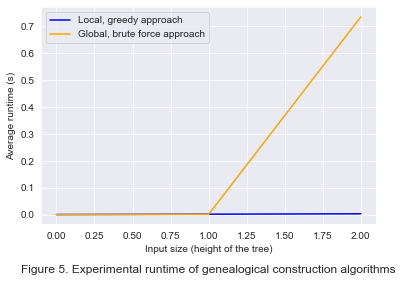

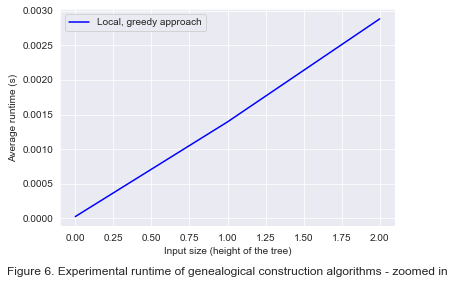

0.0013933999980508815
0.002880599997297395
0.0006990999972913414
0.7354540000014822


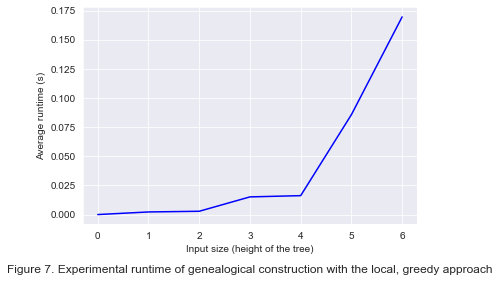

In [76]:
def local_approach_runtime(initial_seq, levels):
    """
    Calculates the average runtime for a set of tasks that represent
    our best case scenario.

    Parameters
    ----------
    initial_seq: str
        parent sequence from which to generate inputs
    height: int
        the height of the tree we must complete when generating inputs

    Returns
    -------
    local_runtime: list
        the average runtime for each input
    """
    local_runtime = []
    for i in range(levels):
        local_inputs = []
        produce_inputs(initial_seq, i, local_inputs)
        local_inputs_matrix = relative_lcs_matrix_updated(local_inputs)
        local_sequence_nodes = []
        for l in range(len(local_inputs)):
            local_sequence_nodes.append(Node(str(l), l))
        local_runtime.append(timeit.timeit(
            lambda: genealogy_local_updated(local_inputs_matrix,
                                    local_sequence_nodes), number=10))
    return local_runtime

def global_approach_runtime(initial_seq, levels):
    """
    Calculates the average runtime for a set of tasks that
    represent our worst case scenario.

    Parameters
    ----------
    initial_seq: str
        parent sequence from which to generate inputs
    height: int
        the height of the tree we must complete when generating inputs

    Returns
    -------
    global_runtime: list
        the average runtime for each input
    """
    global_runtime = []
    for i in range(levels):
        global_inputs = []
        produce_inputs(initial_seq, i, global_inputs)
        global_inputs_matrix = relative_lcs_matrix_updated(global_inputs)
        global_sequence_nodes = []
        for l in range(len(global_inputs)):
            global_sequence_nodes.append(Node(str(l), l))
        global_runtime.append(timeit.timeit(
            lambda: genealogy_global_updated(global_inputs_matrix,
                                            global_sequence_nodes), number=10))
    return global_runtime


initial_sequence = set_strings[1][1]

local_runtime = local_approach_runtime(initial_sequence, 3)
global_runtime = global_approach_runtime(initial_sequence, 3)

sns.set_style("darkgrid")
plt.plot([i for i in range(3)], local_runtime,
         c="blue",
         label="Local, greedy approach")
plt.plot([i for i in range(3)], global_runtime, c="orange",
         label="Global, brute force approach")
plt.xlabel("Input size (height of the tree)")
plt.ylabel("Average runtime (s)")
plt.title("Figure 5. Experimental runtime of genealogical "
          "construction algorithms", y=-0.25)
plt.legend()
plt.show()


sns.set_style("darkgrid")
plt.plot([i for i in range(3)], local_runtime,
         c="blue",
         label="Local, greedy approach")
plt.xlabel("Input size (height of the tree)")
plt.ylabel("Average runtime (s)")
plt.title("Figure 6. Experimental runtime of genealogical construction "
          "algorithms - zoomed in", y=-0.25)
plt.legend()
plt.show()


print(local_runtime[1])
print(local_runtime[2])
print(global_runtime[1])
print(global_runtime[2])

local_runtime_2 = local_approach_runtime(initial_sequence, 7)

sns.set_style("darkgrid")
plt.plot([i for i in range(7)], local_runtime_2,
         c="blue")
plt.xlabel("Input size (height of the tree)")
plt.ylabel("Average runtime (s)")
plt.title("Figure 7. Experimental runtime of genealogical construction "
          "with the local, greedy approach", y=-0.25)
plt.show()

#### Appendix H: Changes in input size and average runtime calculations

In [78]:
local_1 = 0.001354600000922801
local_2 = 0.005793399999674875

global_1 = 0.0007490000007237541
global_2 = 0.9647306999977445

local_runtime_change = local_2/local_1
global_runtime_change = global_2/global_1



# change in average runtime as input doubles
print(local_runtime_change)
print(global_runtime_change)

print("-----")

# factor of growth as per asymptotic analysis
local_growth = (7**3)/(3**3)

global_growth = (math.factorial(7)*7)/(math.factorial(3)*3)

print(local_growth)

print(global_growth)

4.276834486732769
1288.0249653745411
-----
12.703703703703704
1960.0
